# Guia do funcionamento da Simulação do Blind Quantum Computing
##### O documento tem o objetivo de demostrar o funcionamento da simulação dos protocolos Childs e BFK no BQC.
#### IMPORTANDO AS DEPENDÊNCIAS


In [1]:
import random
from quantumnet.components import Network, Host
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger

##### É inicializada a rede, com uma topologia de grade, que apresenta 1 servidor (nó verde) e 8 clientes (nós vermelhos).

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


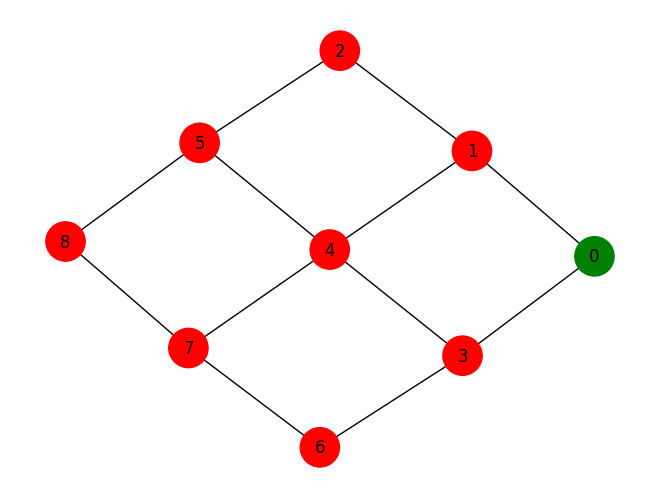

In [2]:
rede = Network()
rede.set_ready_topology('grade',8,3,3)  # Exemplo de uma grade 3x3 com  clientes e 1 servidor
rede.draw()
Logger.activate(Logger)

##### A realização da simulação de uma requesição acontece de forma em que vamos passar uma função para a geração de um circuito aleatório com o número de qubits e número de portas passados como parâmetros e a escolha de um protocolo para executar esse circuito. O protocolo escolhido foi o AC_BQC, Childs, e o cliente é (alice_id).

In [3]:
circuit, num_qubits = rede.generate_random_circuit(num_qubits=5, num_gates=30) 
rede.application_layer.run_app("AC_BQC", alice_id=2, bob_id=0, num_qubits=num_qubits)

     ┌───┐┌───┐        ┌───┐                         ┌───┐┌───┐┌───┐┌───┐     »
q_0: ┤ X ├┤ X ├──────■─┤ T ├─■─────────────X───────■─┤ T ├┤ S ├┤ Y ├┤ T ├─────»
     ├───┤└─┬─┘      │ └───┘ │       ┌───┐ │ ┌───┐ │ └───┘└───┘├───┤└───┘┌───┐»
q_1: ┤ S ├──■────────┼───X───┼─────■─┤ Z ├─┼─┤ Y ├─┼────────X──┤ S ├──■──┤ X ├»
     └───┘     ┌───┐ │   │   │     │ ├───┤ │ ├───┤ │        │  └───┘  │  └───┘»
q_2: ──■───────┤ X ├─┼───┼───┼──X──┼─┤ Y ├─┼─┤ Y ├─┼───X────┼─────────■────X──»
       │  ┌───┐└─┬─┘ │   │   │  │  │ └───┘ │ └───┘ │   │    │              │  »
q_3: ──┼──┤ X ├──■───■───X───┼──X──┼───────┼───────┼───┼────┼──────────────X──»
       │  └─┬─┘┌───┐         │     │       │       │   │    │                 »
q_4: ──■────■──┤ S ├─────────■─────■───────X───────■───X────X─────────────────»
               └───┘                                                          »
«          
«q_0: ─────
«          
«q_1: ─────
«          
«q_2: ─────
«     ┌───┐
«q_3: ┤ X ├
«     └───┘
«q_4: ─────


C:\Users\polya\AppData\Roaming\Python\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)
2024-11-01 10:13:29,302: Circuito aleatório gerado com 5 qubits e 30 portas.
2024-11-01 10:13:29,302: Instrução: {'operation': 'cz', 'qubits': [2, 4]}
2024-11-01 10:13:29,303: Instrução: {'operation': 'x', 'qubits': [0]}
2024-11-01 10:13:29,304: Instrução: {'operation': 'cx', 'qubits': [4, 3]}
2024-11-01 10:13:29,304: Instrução: {'operation': 's', 'qubits': [1]}
2024-11-01 10:13:29,304: Instrução: {'operation': 'cx', 'qubits': [3, 2]}
2024-11-01 10:13:29,305: Instrução: {'operation': 's', 'qubits': [4]}
2024-11-01 10:13:29,305: Instrução: {'operation': 'cx', 'qubits': [1, 0]}
2024-11-01 10:13:29,306: Instr

##### Nesse caso, foi executado o protocolo BFK, com parâmetros como 5 qubits para 5 rounds e 30 portas. Além da escolha de um nó como cliente= alice_id.

In [4]:
circuito, num_qubits = rede.generate_random_circuit(num_qubits=9, num_gates=30)
resultado_bfk = rede.application_layer.run_app("BFK_BQC", alice_id=2, bob_id=0, num_qubits=num_qubits, num_rounds=9)

2024-11-01 10:13:29,604: Circuito aleatório gerado com 9 qubits e 30 portas.


          ┌───┐                                                    ┌───┐      »
q_0: ─────┤ Y ├─────────────────────X──────────────────────────────┤ X ├──────»
          └───┘          ┌───┐      │                   ┌───┐      └─┬─┘      »
q_1: ─────────────────■──┤ Y ├──X───┼───────────────────┤ X ├────■───┼────────»
                      │  └───┘  │   │                   └─┬─┘    │   │        »
q_2: ──■──────────────┼─────────┼───┼─────────────────X───■──────┼───┼────────»
       │  ┌───┐       │         │   │ ┌───┐           │          │   │        »
q_3: ──┼──┤ Z ├───────┼─────────┼───┼─┤ X ├───────────┼──────────┼───┼────────»
       │  ├───┤       │         │   │ └─┬─┘┌───┐┌───┐ │ ┌───┐    │   │        »
q_4: ──┼──┤ X ├───────┼─────────X───┼───┼──┤ Z ├┤ T ├─X─┤ Z ├─X──┼───┼───X────»
     ┌─┴─┐└───┘┌───┐  │  ┌───┐┌───┐ │   │  └───┘└───┘   └───┘ │  │   │   │    »
q_5: ┤ X ├─────┤ X ├──┼──┤ S ├┤ Y ├─X───┼─────────────────────X──┼───■───┼──■─»
     ├───┤┌───┐└─┬─┘  │  ├───┤└───┘     

2024-11-01 10:13:29,604: Instrução: {'operation': 'cx', 'qubits': [7, 8]}
2024-11-01 10:13:29,605: Instrução: {'operation': 'z', 'qubits': [7]}
2024-11-01 10:13:29,606: Instrução: {'operation': 'h', 'qubits': [6]}
2024-11-01 10:13:29,606: Instrução: {'operation': 'cx', 'qubits': [1, 7]}
2024-11-01 10:13:29,607: Instrução: {'operation': 'cx', 'qubits': [2, 5]}
2024-11-01 10:13:29,607: Instrução: {'operation': 'cx', 'qubits': [8, 5]}
2024-11-01 10:13:29,608: Instrução: {'operation': 'x', 'qubits': [4]}
2024-11-01 10:13:29,609: Instrução: {'operation': 'x', 'qubits': [7]}
2024-11-01 10:13:29,609: Instrução: {'operation': 's', 'qubits': [5]}
2024-11-01 10:13:29,610: Instrução: {'operation': 'y', 'qubits': [1]}
2024-11-01 10:13:29,610: Instrução: {'operation': 'y', 'qubits': [5]}
2024-11-01 10:13:29,610: Instrução: {'operation': 'swap', 'qubits': [1, 4]}
2024-11-01 10:13:29,612: Instrução: {'operation': 'y', 'qubits': [0]}
2024-11-01 10:13:29,612: Instrução: {'operation': 'z', 'qubits': [4]

AttributeError: property 'memory' of 'ClientNode' object has no setter

##### Nessa função, podemos coletar a métrica da média da fidelidade dos pares EPRs utilizados nas duas requesições.

In [ ]:
rede.application_layer.avg_fidelity_on_applicationlayer()

A média das fidelidades das rotas é: 0.4042


0.40423510645035404

##### Além de printar as fidelidades das rotas.

In [ ]:
rede.application_layer.print_route_fidelities()

Fidelidades das rotas utilizadas:
0.3209
0.9527
0.0215
0.3394
0.4882
0.2902
0.8616
0.0194
0.3070
0.4415


##### Pode ser coletado os EPRs utilizados na camada de aplicação, consequentemente nas requesições e protocolos.

In [ ]:
#rede.application_layer.print_used_eprs()

In [ ]:
rede.get_total_useds_eprs()

2024-11-01 10:08:32,610: Eprs usados na camada PhysicalLayer: 0
2024-11-01 10:08:32,610: Eprs usados na camada LinkLayer: 0
2024-11-01 10:08:32,610: Eprs usados na camada NetworkLayer: 0
2024-11-01 10:08:32,610: Eprs usados na camada ApplicationLayer: 20


20

In [ ]:
#taxadesucesso